# Data Exploration Analysis

In [1]:
import imageio
#from pprint import pprint
import numpy as np
import pandas as pd
from scipy.misc import imread
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, imshow, axis

## Load data

In [2]:
#data = pd.read_json(path_or_buf='..\data\processed\train.json')
data = pd.read_json(path_or_buf='C:\\marko\\jupyter\\Statoil-Iceberg-Classifier-Challenge\\data\\processed\\train.json')

## Split data into dataset with independent variables (`x`) and dependent variable (`y`)

In [3]:
X = data[["band_1", "band_2", "inc_angle"]] 
y = data["is_iceberg"]

## Split the data into `train` and `test` with `test_size` = 0.2

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
print(X_train.shape)
print(X_test.shape)

(1283, 3)
(321, 3)


In [6]:
class image_manipulation():
    def __init__(self, data, result):
        self.data = data
        self.result = result
    
    # visual display of an 2D numpy array
    def show_image(image, cmap=None, title=None):
        fig = figure(figsize=(25, 25))
        vmax = 255
        plt.figure(figsize=(5, 5))
        plt.imshow(image, cmap=cmap, vmin=0, vmax=vmax)
        plt.axis('off')
        plt.show()
        
        
    def show_example(self, index=0, cmap=None):
        scaler = MinMaxScaler(feature_range=(0, 255))
        example = self.data.iloc[index]
        example_result = self.result.iloc[index]
        id = "N/A" #example["id"]
        inc_angle = example["inc_angle"]
        is_iceberg = str(example_result)
        list_images = []
        list_image_titles = []
        for band in ["band_1", "band_2"]:
            example_band = np.array(example[band]).reshape(75,75)
            scaler.fit(example_band)
            example_image = scaler.transform(example_band)
            list_images.append(example_image)
            list_image_titles.append(band)

        mean_example_image =  sum(list_images)/2
        list_images.append(mean_example_image)
        list_image_titles.append("mean")
        for i in range(len(list_images)):
            plt.subplot(1, 3, i+1)
            plt.axis('off')
            plt.imshow(list_images[i])
            plt.title(list_image_titles[i], fontsize=14)
            plt.subplots_adjust(wspace=0.5)
        
        print("Index: %s, example id: %s, incidence angle: %s, is iceberg: %s" % (index, id, inc_angle, is_iceberg))

## Visualize image - `band_1`, `band_2` and `mean`

Index: 500, example id: N/A, incidence angle: 42.5591, is iceberg: 1


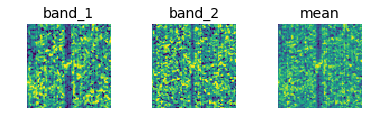

In [7]:
index=500
im = image_manipulation(data=X_train, result=y_train)
im.show_example(index=index, cmap="gray")

### Show ratio of "is_iceberg" on train data

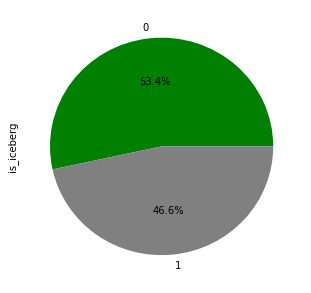

In [8]:
df_is_iceberg = pd.DataFrame(y_train).groupby("is_iceberg")["is_iceberg"].count()
df_is_iceberg.plot.pie(figsize=(5,5), autopct='%1.1f%%', colors=["green", "grey"])
plt.show()

(75, 75)


<Figure size 1800x1800 with 0 Axes>

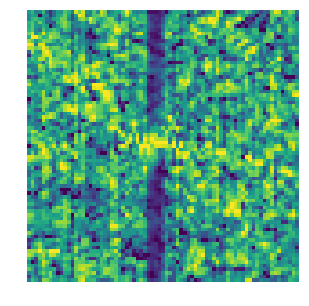

In [9]:
example = np.array(data["band_1"].iloc[0]).reshape(75,75)
print(example.shape)
def show_image(image, cmap=None, title=None):
    scaler = MinMaxScaler(feature_range=(0, 255))
    scaler.fit(image)
    image = scaler.transform(image)
    fig = figure(figsize=(25, 25))
    vmax = 255
    plt.figure(figsize=(5, 5))
    plt.imshow(image, cmap=cmap, vmin=0, vmax=vmax)
    plt.axis('off')
    plt.show()
    
show_image(image=example)

In [10]:
def reduce_spatial_dimension(image):
    """
    Reduces dimension of a 75x75 image to 25x25
    According to numpy.nbytes, the size of image before reduction is 45kB and 5kB after
    Inputs:
    - image: 2d array
    Returns:
    - reduced_image: Reduced image
    """
    reduced_image = np.zeros((25, 25))
    filter_size = reduced_image.shape[0]
    padding = int(image.shape[0] / reduced_image.shape[0])
    counter = 0
    counter_i = 0 # counter in i loop for indexing rows
    for i in range(0, image.shape[0], padding):
        counter_j = 0 # counter in j loop for indexing columns
        for j in range(0, image.shape[1], padding):
            max_val = np.max(image[i:padding+i, j:padding+j])
            counter += 1
            reduced_image[counter_i][counter_j] = max_val
            counter_j += 1
        counter_i += 1
    return reduced_image

In [11]:
new_image = reduce_spatial_dimension(image=example)

<Figure size 1800x1800 with 0 Axes>

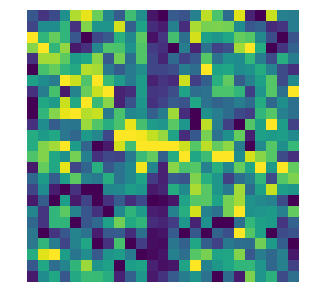

(25, 25)


In [12]:
show_image(image=new_image)
print(new_image.shape)

<Figure size 1800x1800 with 0 Axes>

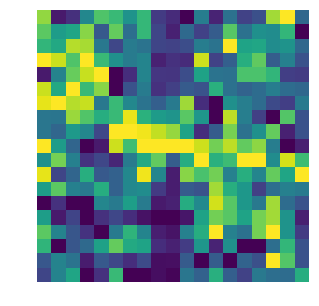

(19, 19)


In [13]:
def image_cutoff(cutoff, image):
    n_rows, n_cols = image.shape
    return image[cutoff:n_rows-cutoff, cutoff:n_cols-cutoff]

cut_image = image_cutoff(cutoff=3, image=new_image)
show_image(image=cut_image)
print(cut_image.shape)

In [14]:
s1 = cut_image.flatten().shape[0]
size_orig = new_image.flatten().shape[0]

print(s1, size_orig)
print(s1/size_orig)


361 625
0.5776
